# HMM-RNN Experiments

This notebook demonstrates how to run experiments using the MANAGER class.

In [1]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Import our modules
from scripts.manager import Manager
from scripts.rnn import RNN
from scripts.mechint import visualize_flow_field
from scripts.ReLU import visualize_flow

## Run a Single Experiment

Let's run a single experiment with verbose output to see the training progress.


--- Running experiment with config = HMMThree ---


--- Running experiment with seq_len = 30 ---

Created directory structure in Experiments/20250321_155922/HMMThree
Starting experiment at 2025-03-21 15:59:22.703019
Configuration saved to Experiments/20250321_155922/HMMThree/config.pkl and Experiments/20250321_155922/HMMThree/config.json
Starting RNN training...
Transition Matrix:
[[0.7763932 0.2236068 0.       ]
 [0.2236068 0.5527864 0.2236068]
 [0.        0.2236068 0.7763932]]
Emission Probabilities:
[[0.99  0.01  0.   ]
 [0.495 0.01  0.495]
 [0.    0.01  0.99 ]]
Generating HMM data...
Splitting data...
HMM data saved to Experiments/20250321_155922/HMMThree/data/hmm_sequences.pkl
Training with learning rate: 0.001
Model saved to Experiments/20250321_155922/HMMThree/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth
Loss plot saved to Experiments/20250321_155922/HMMThree/figs/loss_curves.pdf
Best model achieved with learning rate 0.001 and loss 4.075169
GPU memory cleared
Runnin

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq1_flat = torch.tensor(seq1_flat).float().to(self.device)
/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq2_flat = torch.tensor(seq2_flat).float().to(self.device)


Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250321_155922/HMMThree/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.5097112  0.17319332 0.05644618 0.04746155 0.0148565 ]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250321_155922/HMMThree/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250321_155922/HMMThree/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250321_155922/HMMThree/results.pkl
Experiment summary saved to Experiments/20250321_155922/HMMThree/summary.json
Experiment completed in 6.02 minutes

--- Running experiment with seq_len = 30 ---

Created directory structure in Experiments/20250321_160524/HMMThree
Starting experiment at 2025-03-21 16:0

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250321_160524/HMMThree/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.4911303  0.15879442 0.06499907 0.04317604 0.01631527]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250321_160524/HMMThree/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250321_160524/HMMThree/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250321_160524/HMMThree/results.pkl
Experiment summary saved to Experiments/20250321_160524/HMMThree/summary.json
Experiment completed in 5.91 minutes

--- Running experiment with seq_len = 30 ---

Created directory structure in Experiments/20250321_161118/HMMThree
Starting experiment at 2025-03-21 16:1

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250321_161118/HMMThree/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.522182   0.17056423 0.05159617 0.04515281 0.01734632]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250321_161118/HMMThree/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250321_161118/HMMThree/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250321_161118/HMMThree/results.pkl
Experiment summary saved to Experiments/20250321_161118/HMMThree/summary.json
Experiment completed in 5.80 minutes

--- Running experiment with seq_len = 30 ---

Created directory structure in Experiments/20250321_161706/HMMThree
Starting experiment at 2025-03-21 16:1

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250321_161706/HMMThree/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.52952904 0.15290487 0.05885131 0.04045132 0.01628417]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250321_161706/HMMThree/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250321_161706/HMMThree/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250321_161706/HMMThree/results.pkl
Experiment summary saved to Experiments/20250321_161706/HMMThree/summary.json
Experiment completed in 5.88 minutes

--- Running experiment with seq_len = 40 ---

Created directory structure in Experiments/20250321_162300/HMMThree
Starting experiment at 2025-03-21 16:2

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250321_162300/HMMThree/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.4933337  0.15626281 0.07641841 0.03846196 0.01625292]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250321_162300/HMMThree/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250321_162300/HMMThree/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250321_162300/HMMThree/results.pkl
Experiment summary saved to Experiments/20250321_162300/HMMThree/summary.json
Experiment completed in 5.25 minutes

--- Running experiment with seq_len = 40 ---

Created directory structure in Experiments/20250321_162815/HMMThree
Starting experiment at 2025-03-21 16:2

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250321_162815/HMMThree/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.47008467 0.1835722  0.05456892 0.05256813 0.01312211]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250321_162815/HMMThree/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250321_162815/HMMThree/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250321_162815/HMMThree/results.pkl
Experiment summary saved to Experiments/20250321_162815/HMMThree/summary.json
Experiment completed in 5.28 minutes

--- Running experiment with seq_len = 40 ---

Created directory structure in Experiments/20250321_163332/HMMThree
Starting experiment at 2025-03-21 16:3

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250321_163332/HMMThree/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.5296289  0.15014644 0.06769615 0.04135067 0.01243994]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250321_163332/HMMThree/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250321_163332/HMMThree/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250321_163332/HMMThree/results.pkl
Experiment summary saved to Experiments/20250321_163332/HMMThree/summary.json
Experiment completed in 5.24 minutes

--- Running experiment with seq_len = 40 ---

Created directory structure in Experiments/20250321_163847/HMMThree
Starting experiment at 2025-03-21 16:3

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250321_163847/HMMThree/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.48386332 0.16577904 0.05352539 0.04843055 0.01120794]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250321_163847/HMMThree/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250321_163847/HMMThree/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250321_163847/HMMThree/results.pkl
Experiment summary saved to Experiments/20250321_163847/HMMThree/summary.json
Experiment completed in 5.21 minutes

--- All experiments completed ---


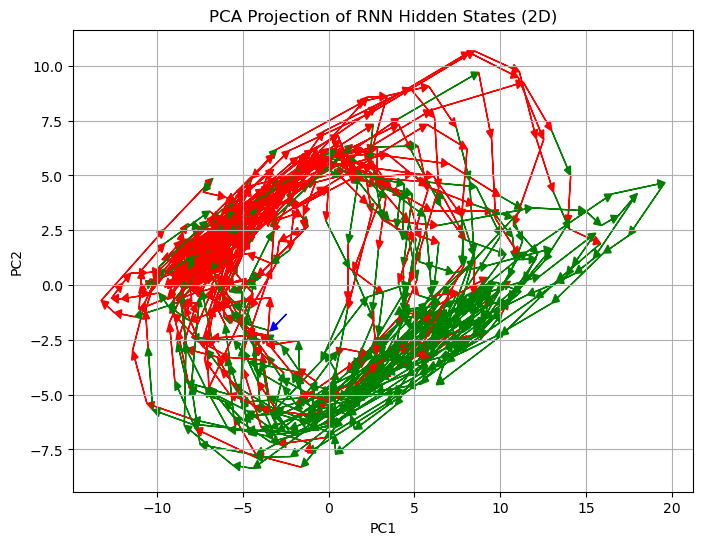

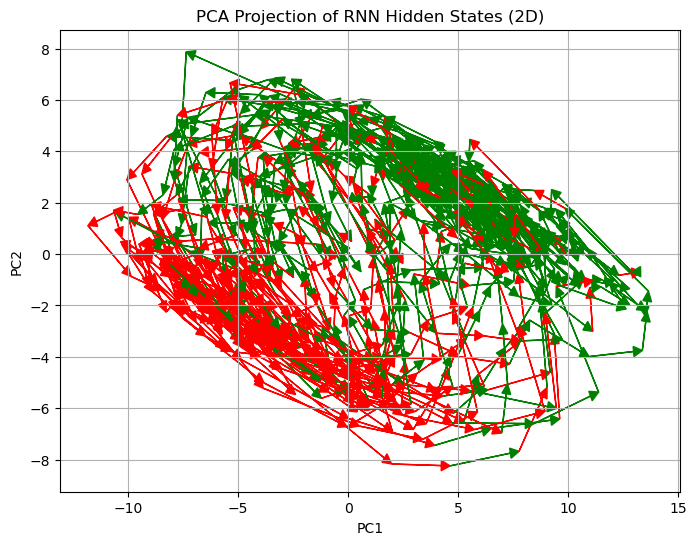

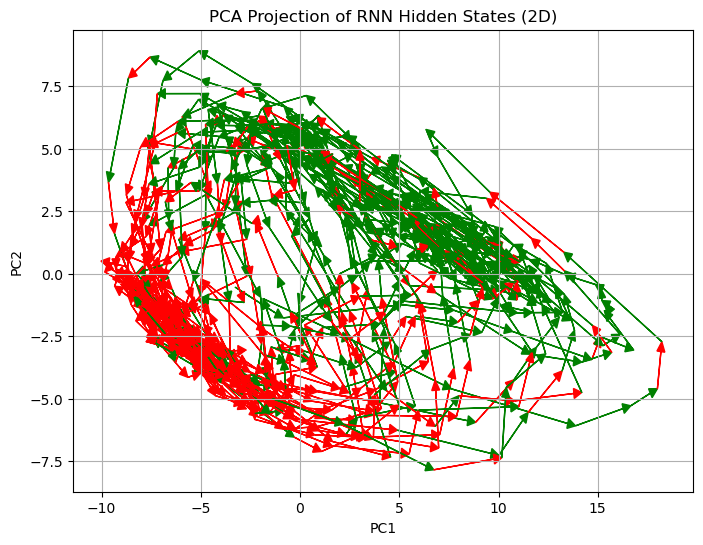

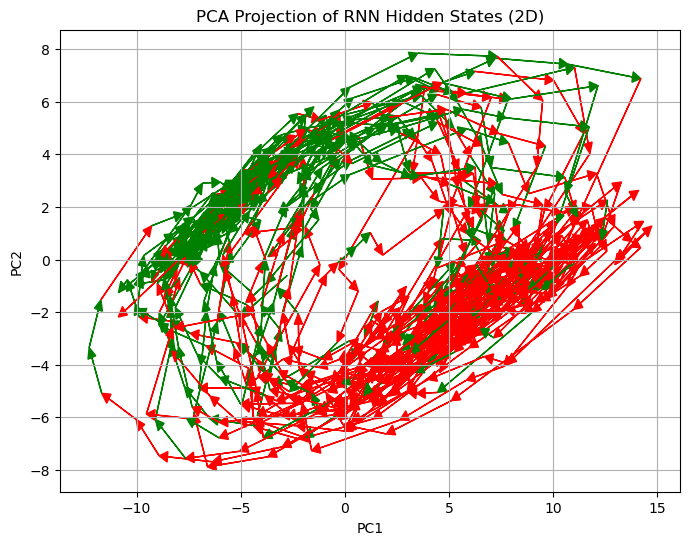

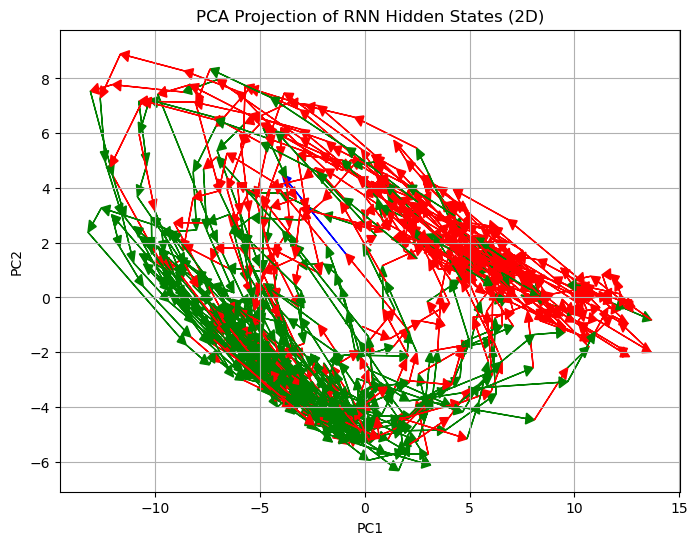

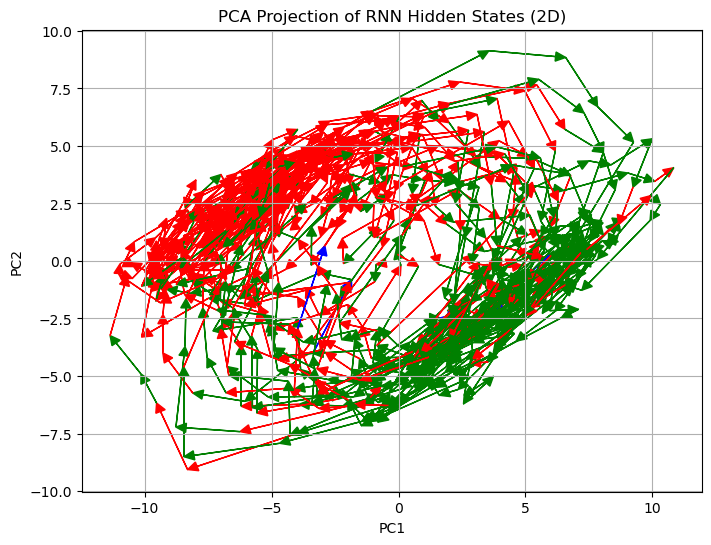

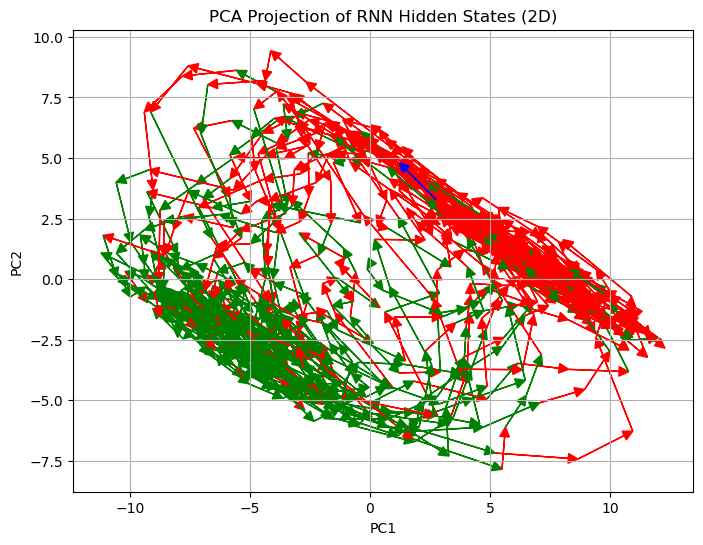

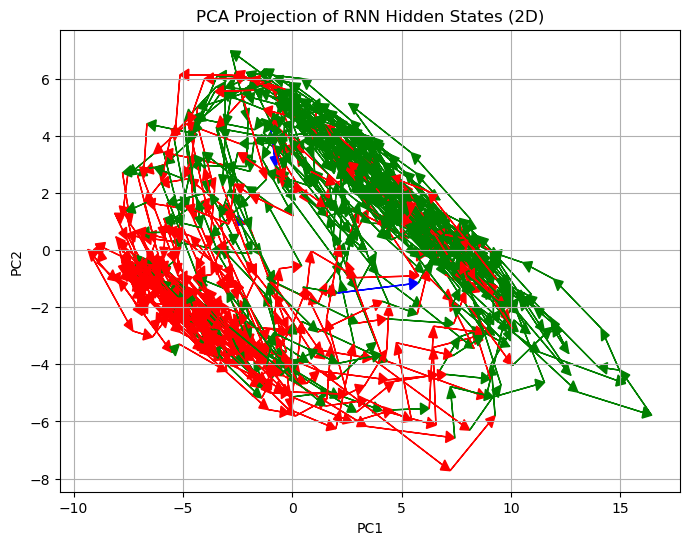

In [2]:
# Initialize a list of sequence lengths to experiment with
#seq_lengths_2 = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
#seq_lengths_rest = [30, 35, 40]
seq_lengths = [30, 30, 30, 30, 40, 40, 40, 40]
configs = ["HMMThree"]
for name in configs:
    print(f"\n--- Running experiment with config = {name} ---\n")
        
    for seq_len in seq_lengths:
        print(f"\n--- Running experiment with seq_len = {seq_len} ---\n")

        manager = Manager(config_name=name)
        manager.config['seq_len'] = seq_len
        
        # Print the updated configuration
        #print("Configuration:")
        #for key, value in manager.config.items(): 
            #print(f"  {key}: {value}")
        
        # Run the experiment with verbose output
        results = manager.run_experiment(verbose=False)
    
print("\n--- All experiments completed ---")

## Explore the Results

After the experiment completes, we can explore the results directory.

In [ ]:
# Show the experiment directory structure
import os

def print_directory_tree(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

print_directory_tree("Experiments")

## Running Multiple Experiments

You can also run multiple experiments in sequence.

Created directory structure in Experiments/20250319_231232/CustomConfig
Running experiment with config: HMMTwo
Created directory structure in Experiments/20250319_231232/HMMTwo
Starting experiment at 2025-03-19 23:12:32.373053
Configuration saved to Experiments/20250319_231232/HMMTwo/config.pkl and Experiments/20250319_231232/HMMTwo/config.json
Starting RNN training...
Transition Matrix:
[[0.95 0.05]
 [0.05 0.95]]
Emission Probabilities:
[[0.99 0.01 0.  ]
 [0.   0.01 0.99]]
Generating HMM data...
Splitting data...
HMM data saved to Experiments/20250319_231232/HMMTwo/data/hmm_sequences.pkl
Training with learning rate: 0.001
Model saved to Experiments/20250319_231232/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_0.9Loss.pth
Loss plot saved to Experiments/20250319_231232/HMMTwo/figs/loss_curves.pdf
Best model achieved with learning rate 0.001 and loss 0.851882
GPU memory cleared
Running model tests...
Generating test data...
Generating HMM test sequences...
Generating RNN test sequen

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250319_231232/HMMTwo/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.54679036 0.10521388 0.09608879 0.0260876  0.02119969]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250319_231232/HMMTwo/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250319_231232/HMMTwo/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250319_231232/HMMTwo/results.pkl
Experiment summary saved to Experiments/20250319_231232/HMMTwo/summary.json
Experiment completed in 7.47 minutes
Running experiment with config: HMMThree
Created directory structure in Experiments/20250319_231232/HMMThree
Starting experiment at 2025-03-19 23:20:00.825241
Conf

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250319_231232/HMMThree/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.5047991  0.17323168 0.06854861 0.04854442 0.01401891]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250319_231232/HMMThree/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250319_231232/HMMThree/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250319_231232/HMMThree/results.pkl
Experiment summary saved to Experiments/20250319_231232/HMMThree/summary.json
Experiment completed in 5.77 minutes
Running experiment with config: HMMFour
Created directory structure in Experiments/20250319_231232/HMMFour
Starting experiment at 2025-03-19 23:25:47.306

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250319_231232/HMMFour/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.49990314 0.15695868 0.06233254 0.04289323 0.01530291]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250319_231232/HMMFour/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250319_231232/HMMFour/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250319_231232/HMMFour/results.pkl
Experiment summary saved to Experiments/20250319_231232/HMMFour/summary.json
Experiment completed in 5.26 minutes
Running experiment with config: HMMFive
Created directory structure in Experiments/20250319_231232/HMMFive
Starting experiment at 2025-03-19 23:31:03.033271
C

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250319_231232/HMMFive/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.0501471  0.04623019 0.04462345 0.04343253 0.03759456]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250319_231232/HMMFive/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250319_231232/HMMFive/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250319_231232/HMMFive/results.pkl
Experiment summary saved to Experiments/20250319_231232/HMMFive/summary.json
Experiment completed in 9.81 minutes
All experiments completed.
Results saved in: Experiments/20250319_231232


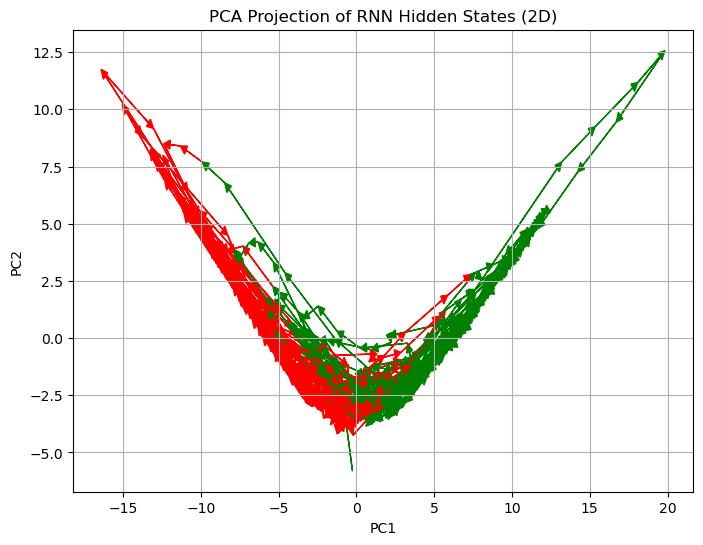

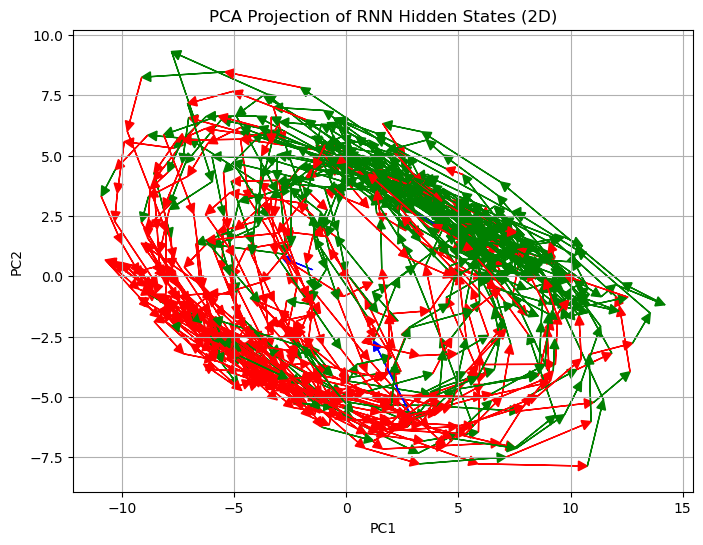

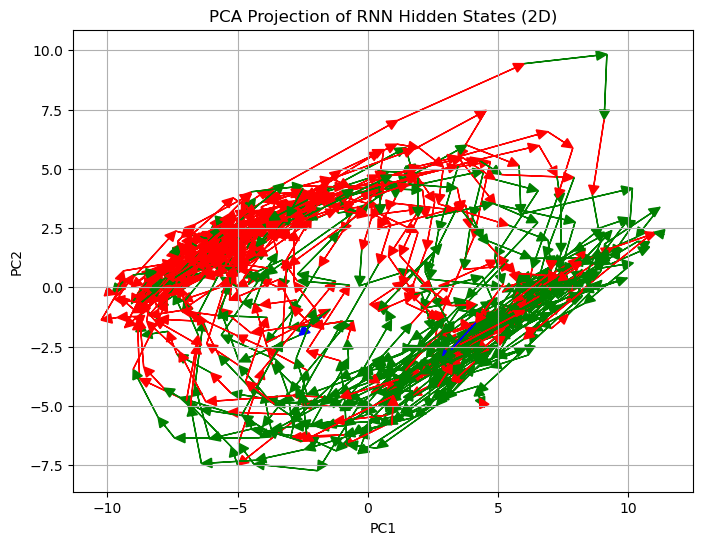

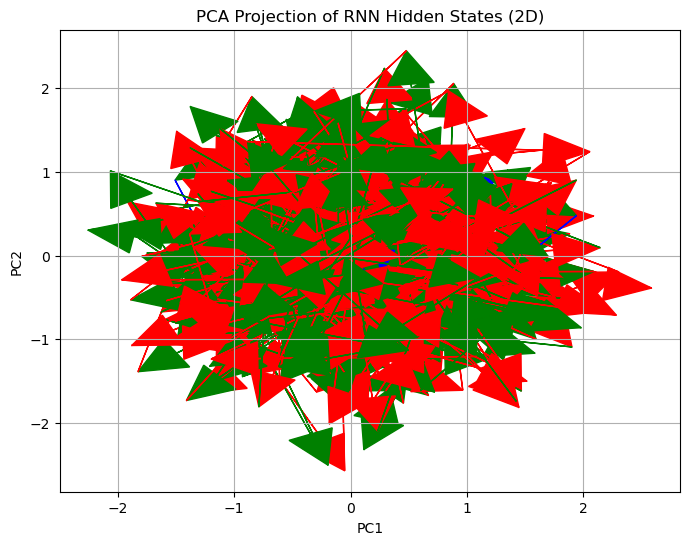

In [3]:
# Create a new manager
multi_manager = Manager()

# Run multiple experiments
config_names = ["HMMTwo", "HMMThree", "HMMFour", "HMMFive"]
all_results = multi_manager.run_multiple_experiments(config_names, verbose=False)

## Fixed Point Finder

### From Directory

In [2]:
manager = Manager(config_name="HMMThree_RGB")

# Point to the experiment directory where your model is saved
manager.config_dir = Path("Experiments/20250304_162931/HMMThree_RGB")
manager.models_path = manager.config_dir / "models"
manager.figs_path = manager.config_dir / "figs"
manager.data_path = manager.config_dir / "data"

Created directory structure in Experiments/20250305_224203/HMMThree_RGB


/home/elia/Documents/rnnrep/scripts/rnn.py:248: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


Model loaded from Experiments/20250304_162931/HMMThree_RGB/models/3HMM_3Outputs_custom_30kData_0.001lr_30.4Loss.pth

Searching for fixed points from 1000 initial states.

	Freezing model parameters so model is not affected by fixed point optimization.
	Finding fixed points via joint optimization.
	Optimization complete to desired tolerance.
		2 iters
		q = 0.00e+00 +/- 0.00e+00
		dq = 0.00e+00 +/- 0.00e+00
		learning rate = 1.00e+00
		avg iter time = 5.65e-03 sec
	Identified 1 unique fixed points.
		initial_states: 1000 outliers detected (of 1000).
		fixed points: 1 outliers detected (of 1).
	Decomposing Jacobians in a single batch.
	Sorting by Eigenvalue magnitude.
	Fixed point finding complete.

All fixed points saved to Experiments/20250304_162931/HMMThree_RGB/fixed_points_all.pkl
Unique fixed points saved to Experiments/20250304_162931/HMMThree_RGB/fixed_points_unique.pkl


/home/elia/Documents/rnnrep/fixed_point_finder/FixedPointFinderBase.py:734: RuntimeWarning: invalid value encountered in divide
  scaled_init_dists = np.true_divide(init_dists, avg_init_dist)
/home/elia/Documents/rnnrep/fixed_point_finder/FixedPointFinderBase.py:740: RuntimeWarning: invalid value encountered in divide
  scaled_fps_dists = np.true_divide(fps_dists, avg_init_dist)
/home/elia/anaconda3/envs/deep/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:653: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


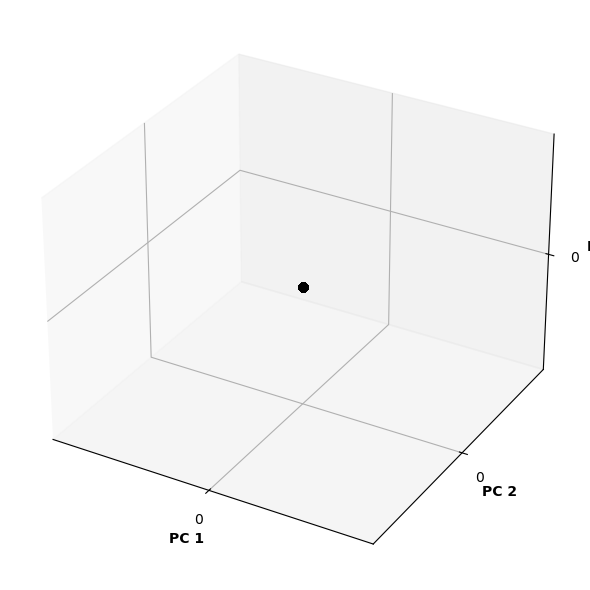

Fixed points plot saved to Experiments/20250304_162931/HMMThree_RGB/figs/fixed_points_unique_plot.pdf
Found 0 total fixed points, 1000 unique fixed points


In [4]:
all_fps, unique_fps = manager.find_fixed_points(num_initial_states=1000)
print(f"Found {len(all_fps)} total fixed points, {len(unique_fps)} unique fixed points")

### From .pth Model

Created directory structure in Experiments/20250306_003127/CustomConfig
Model loaded from /home/elia/Documents/rnnrep/old_models/5HMM_3Outputs_30kData_0.001lr_37.3Loss.pth


/home/elia/Documents/rnnrep/scripts/rnn.py:248: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))



Searching for fixed points from 1000 initial states.

	Freezing model parameters so model is not affected by fixed point optimization.
	Finding fixed points via joint optimization.
	Optimization complete to desired tolerance.
		2 iters
		q = 0.00e+00 +/- 0.00e+00
		dq = 0.00e+00 +/- 0.00e+00
		learning rate = 1.00e+00
		avg iter time = 7.83e-04 sec
	Identified 1 unique fixed points.
		initial_states: 1000 outliers detected (of 1000).
		fixed points: 1 outliers detected (of 1).
	Decomposing Jacobians in a single batch.
	Sorting by Eigenvalue magnitude.
	Fixed point finding complete.

All fixed points saved to Experiments/20250306_003127/CustomConfig/fixed_points_all.pkl
Unique fixed points saved to Experiments/20250306_003127/CustomConfig/fixed_points_unique.pkl


/home/elia/Documents/rnnrep/fixed_point_finder/FixedPointFinderBase.py:734: RuntimeWarning: invalid value encountered in divide
  scaled_init_dists = np.true_divide(init_dists, avg_init_dist)
/home/elia/Documents/rnnrep/fixed_point_finder/FixedPointFinderBase.py:740: RuntimeWarning: invalid value encountered in divide
  scaled_fps_dists = np.true_divide(fps_dists, avg_init_dist)
/home/elia/anaconda3/envs/deep/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:653: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


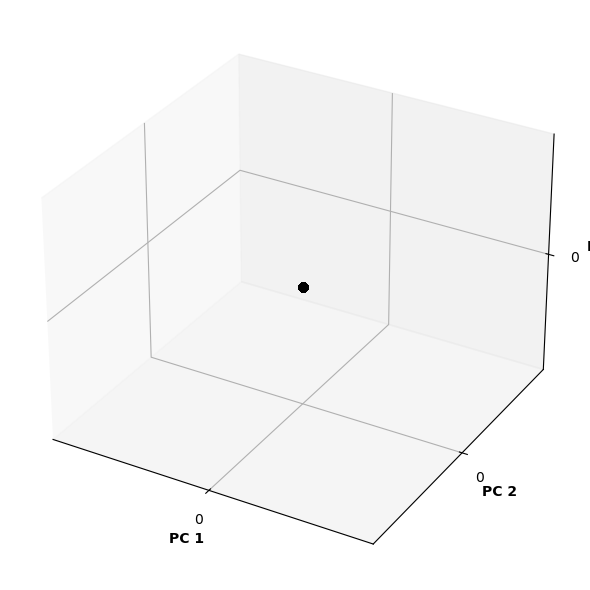

Fixed points plot saved to Experiments/20250306_003127/CustomConfig/figs/fixed_points_unique_plot.pdf
Found 0 total fixed points, 1000 unique fixed points


In [5]:
#old_models
#/home/elia/Documents/rnnrep/old_models/2HMM_3Outputs_30kData_0.001lr_19.4Loss.pth
#/home/elia/Documents/rnnrep/old_models/3HMM_3Outputs_30kData_0.001lr_31.9Loss.pth
#/home/elia/Documents/rnnrep/old_models/4HMM_3Outputs_30kData_0.001lr_33.2Loss.pth
#/home/elia/Documents/rnnrep/old_models/5HMM_3Outputs_30kData_0.001lr_37.3Loss.pth
manager = Manager()
all_fps, unique_fps = manager.find_fixed_points(num_initial_states=1000, num_traj=10, plot_unique=True, model_path="/home/elia/Documents/rnnrep/old_models/5HMM_3Outputs_30kData_0.001lr_37.3Loss.pth")
print(f"Found {len(all_fps)} total fixed points, {len(unique_fps)} unique fixed points")

## Exploration

/home/elia/Documents/rnnrep/scripts/rnn.py:286: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


Model loaded from /home/elia/Documents/rnnrep/Experiments/2/2_100_1/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth
Explained variance ratio: [0.56169015 0.13643615]
Creating 15x15 grid in PCA space...
(225, 150)
Model loaded from /home/elia/Documents/rnnrep/Experiments/2/2_100_1/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth


/home/elia/Documents/rnnrep/scripts/rnn.py:286: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


Explained variance ratio: [0.5633271  0.13630052]
Creating 15x15 grid in PCA space...
(225, 150)
Model loaded from /home/elia/Documents/rnnrep/Experiments/2/2_100_0/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_9.8Loss.pth


/home/elia/Documents/rnnrep/scripts/rnn.py:286: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


Explained variance ratio: [0.49779773 0.12966247]
Creating 15x15 grid in PCA space...
(225, 150)
Model loaded from /home/elia/Documents/rnnrep/Experiments/2/2_100_0/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_9.8Loss.pth


/home/elia/Documents/rnnrep/scripts/rnn.py:286: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


Explained variance ratio: [0.49707958 0.12968664]
Creating 15x15 grid in PCA space...
(225, 150)


(<Figure size 1800x600 with 4 Axes>,
 array([<Axes: title={'center': 'Recurrence Only'}, xlabel='PC1', ylabel='PC2'>,
        <Axes: title={'center': 'Input Only'}, xlabel='PC1', ylabel='PC2'>,
        <Axes: title={'center': 'Full Dynamics'}, xlabel='PC1', ylabel='PC2'>],
       dtype=object))

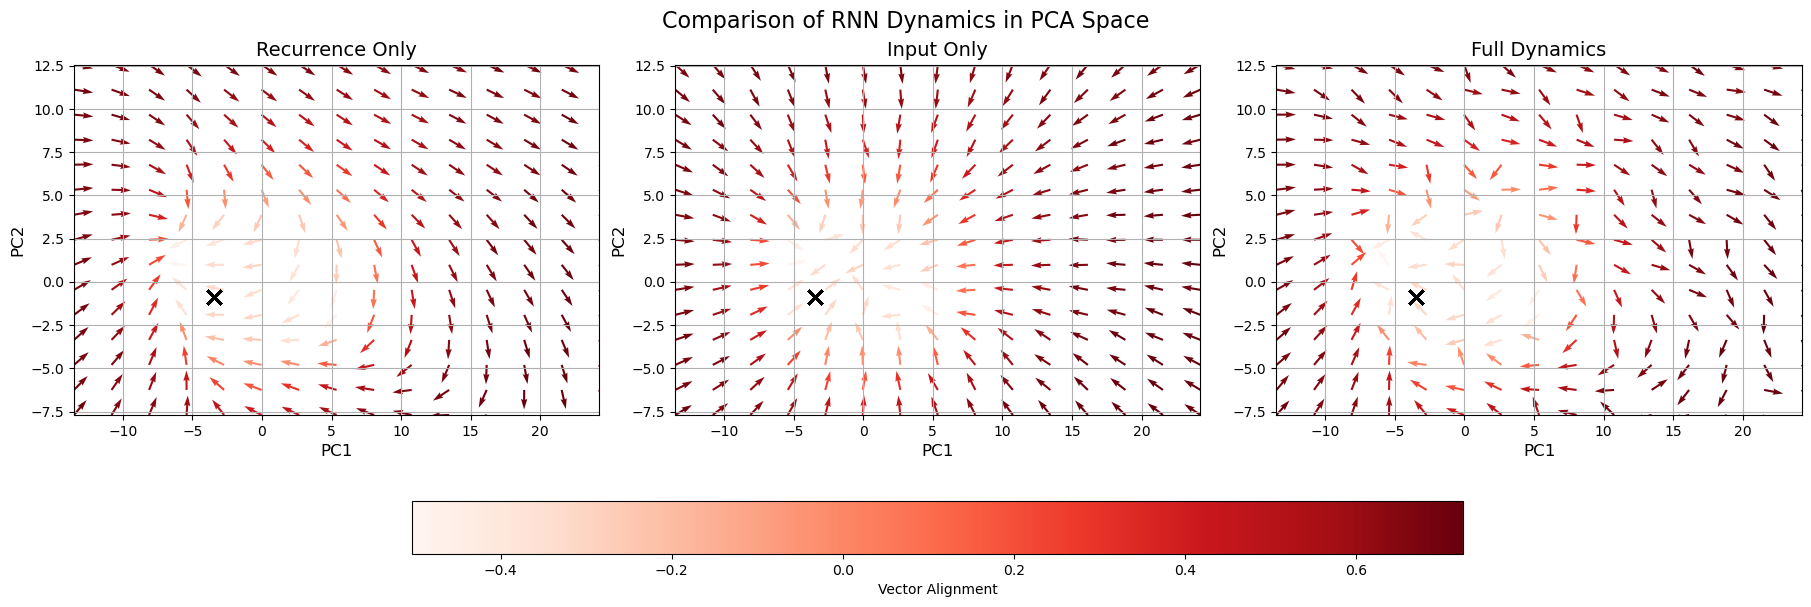

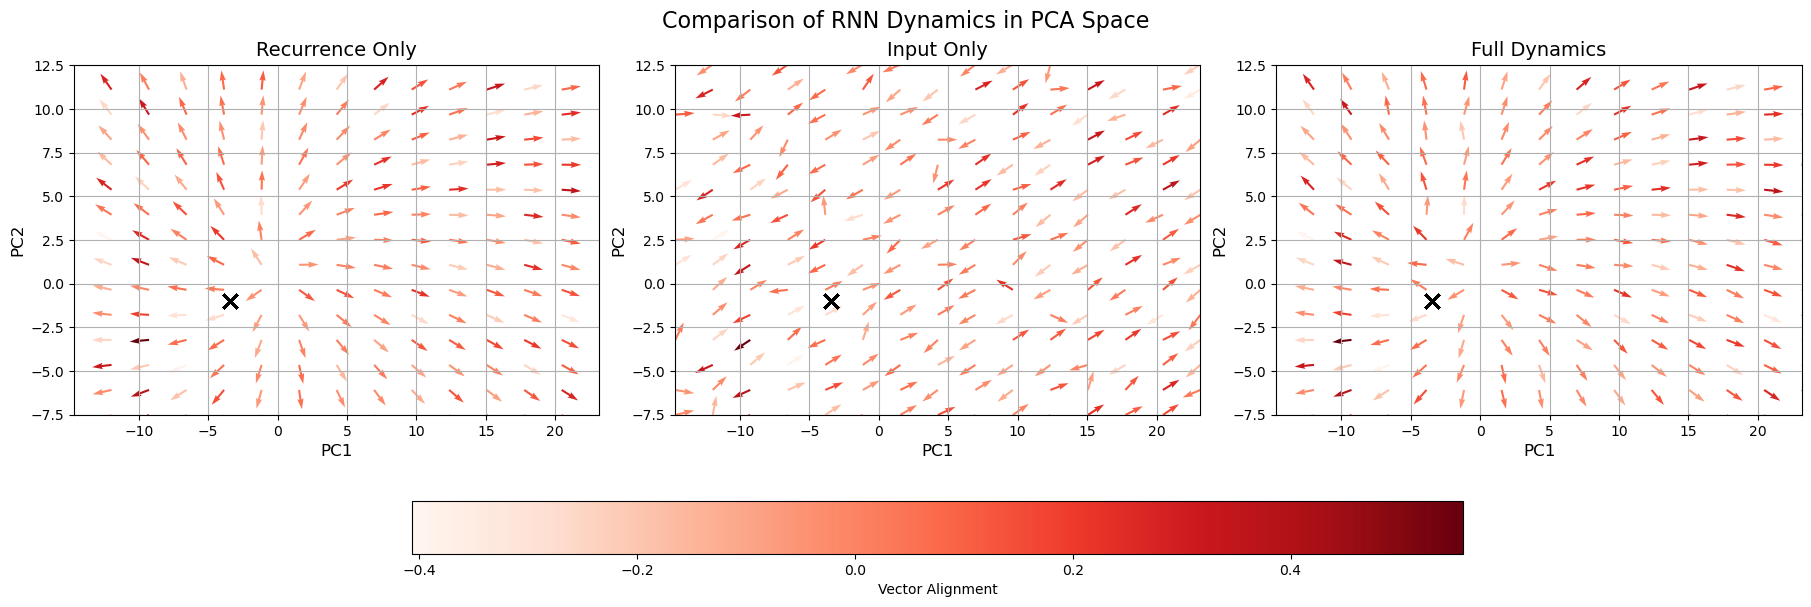

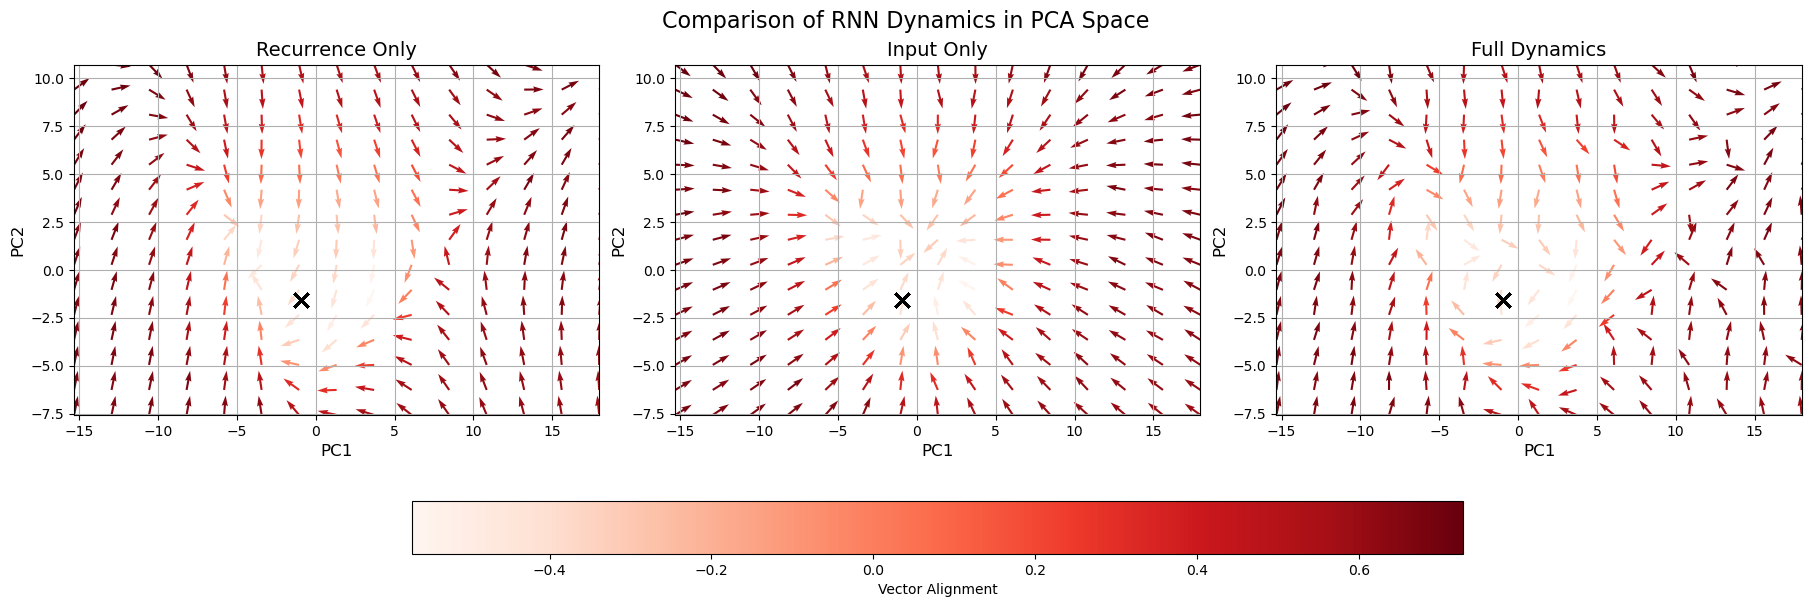

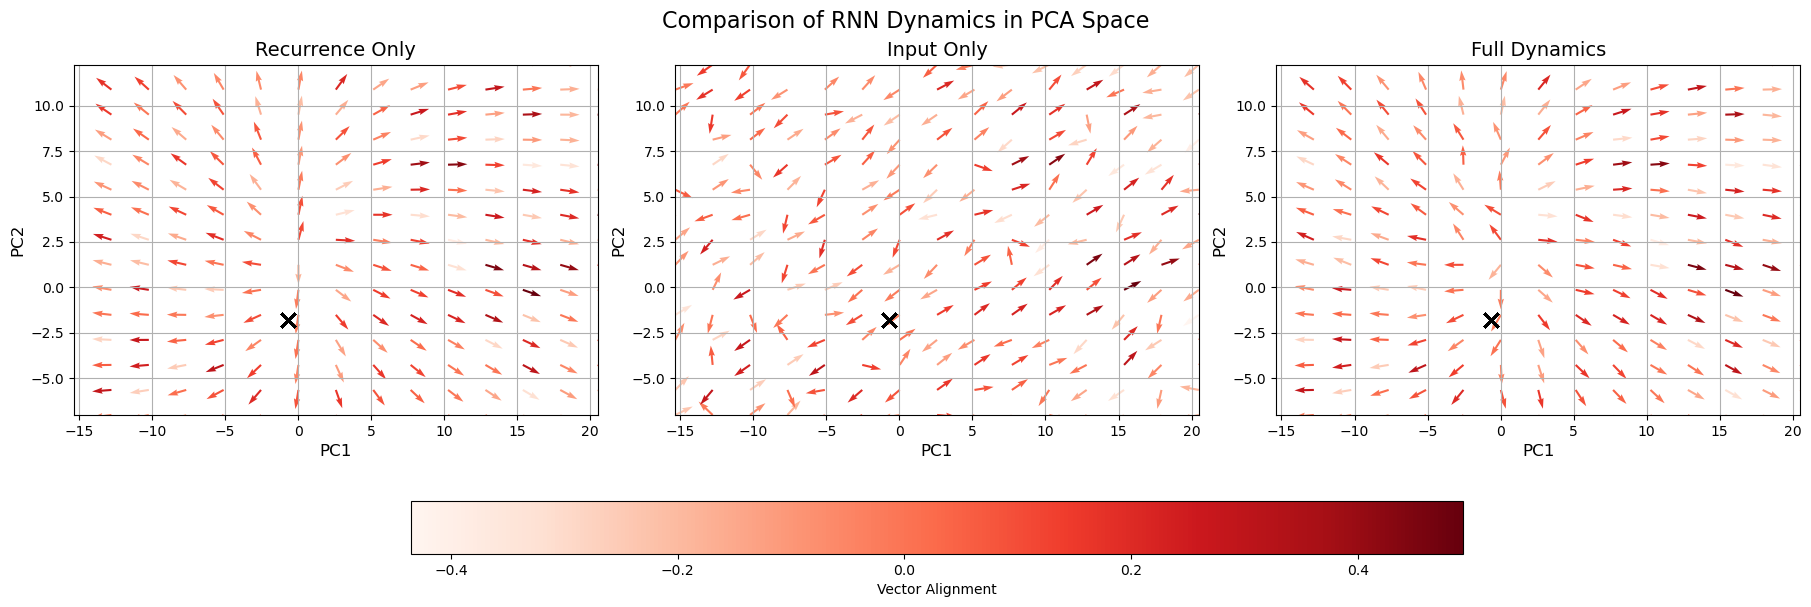

In [5]:
visualize_flow_field("/home/elia/Documents/rnnrep/Experiments/2/2_100_1/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", is_2d=True, combined_plot=True, alignment_method='cosine', use_relu=True)
visualize_flow_field("/home/elia/Documents/rnnrep/Experiments/2/2_100_1/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", is_2d=True, combined_plot=True, alignment_method='cosine', use_relu=False)
visualize_flow_field("/home/elia/Documents/rnnrep/Experiments/2/2_100_0/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_9.8Loss.pth", is_2d=True, combined_plot=True, alignment_method='cosine', use_relu=True)
visualize_flow_field("/home/elia/Documents/rnnrep/Experiments/2/2_100_0/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_9.8Loss.pth", is_2d=True, combined_plot=True, alignment_method='cosine', use_relu=False)


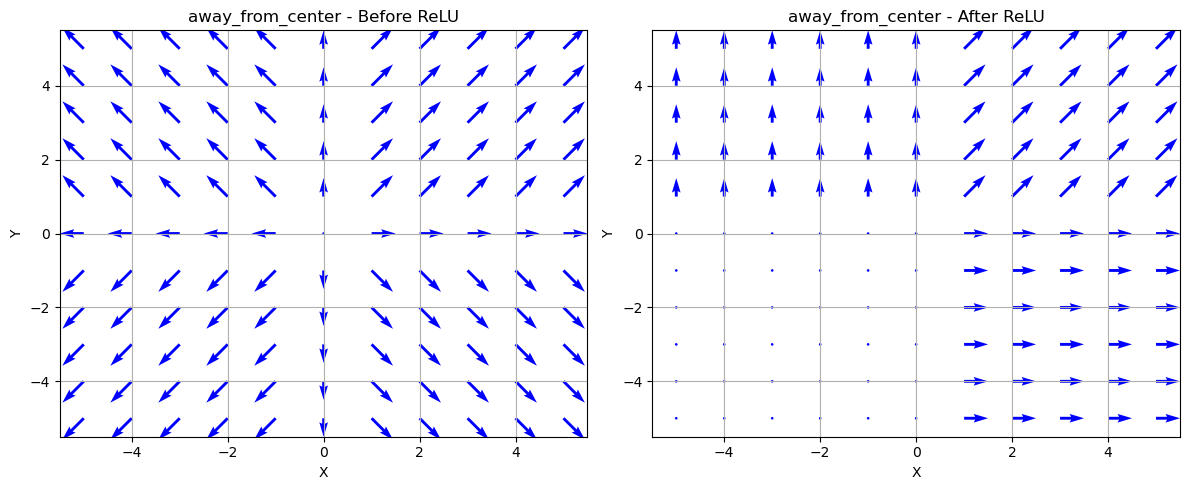

In [2]:
visualize_flow('away_from_center')
plt.show()